Max transfer time for env S16_C16_N1000 :     127.278433
Average transfer time for env S16_C16_N1000 : 31.93917594269341
Min transfer time for env S16_C16_N1000 :     12.588155
Max throughput for env S16_C16_N1000 :     612.9366564043737


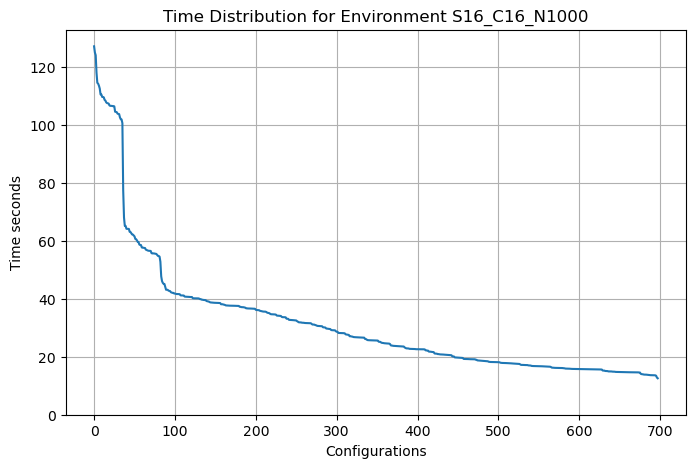

Max transfer time for env S16_C16_N100000 :     128.102007
Average transfer time for env S16_C16_N100000 : 30.50767892761394
Min transfer time for env S16_C16_N100000 :     12.519244
Max throughput for env S16_C16_N100000 :     616.3105085259141


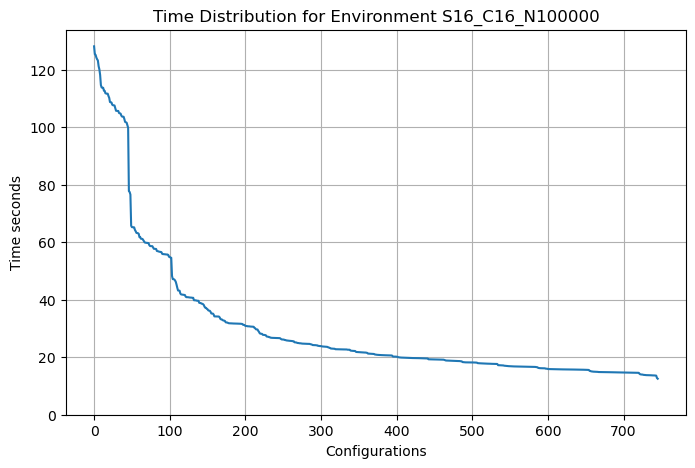

In [60]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

def get_file_list(base_path, signatures):
    """Generate file lists for the given base path and environment signatures."""
    return [glob.glob(f"{base_path}/{signature}_random_sample*.csv") for signature in signatures]

def load_and_filter_data(file_list, max_config_id, time_threshold=2):
    """Load and filter data based on time and config_id."""
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        df = df[(df['time'] > time_threshold) & (df['config_id'] < max_config_id)]
        data_frames.append(df)
    return pd.concat(data_frames, axis=0, ignore_index=True) if data_frames else pd.DataFrame()

BASE_PATH = "C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_10_5M_semi_flex"


ENV_SIGNATURES_NEW_BASE_ENVS = [
    "S2_C2_N50","S2_C8_N50","S4_C16_N50","S8_C8_N50","S8_C2_N50","S8_C16_N50","S16_C4_N50","S16_C8_N50","S16_C16_N50",
                             "S2_C2_N150","S2_C8_N150","S4_C16_N150","S8_C8_N150","S8_C2_N150","S8_C16_N150","S16_C4_N150","S16_C8_N150","S16_C16_N150",
                             "S2_C2_N1000","S2_C8_N1000","S4_C16_N1000","S8_C8_N1000","S8_C2_N1000","S8_C16_N1000","S16_C4_N1000","S16_C8_N1000","S16_C16_N1000"
]

ENV_SIGNATURES_NEW_BASE_ENVS_EXTRA = [
    "S16_C16_N1000", "S16_C16_N100000",
]
env_lists = {
    #"NEW_BASE":ENV_SIGNATURES_NEW_BASE_ENVS,
    'exra':ENV_SIGNATURES_NEW_BASE_ENVS_EXTRA,
}

for name, env_list in env_lists.items():
    
    file_lists = get_file_list(BASE_PATH, env_list)
    df_heatmap = pd.DataFrame(0, index=env_list, columns=env_list, dtype=float)
    
    N = 66
    for i, file_list in enumerate(file_lists):

        env = ""
        algo = ""
    
        all_data = pd.DataFrame()
        list_single_dfs_1310k = []
    
        for file in file_list:
    
            env = file.split("/")[-1].split("\\")[1].split("_random")[0]
            algo = file.split("\\")[-2]
    
            df = pd.read_csv(file)
            df = df[df['transfer_id'] > 1]
    
            #df = df[df['config_id'] < 500]
    
            list_single_dfs_1310k.append(df)
        try:   
            all_data = pd.concat(list_single_dfs_1310k, axis=0, ignore_index=True)
        
            all_data = all_data.sort_values(by='time',ascending=False).reset_index()
            
            
            print(f"Max transfer time for env {env} :     {all_data['time'].max()}")
            print(f"Average transfer time for env {env} : {statistics.mean(all_data['time'])}")
            print(f"Min transfer time for env {env} :     {all_data['time'].min()}")
            print(f"Max throughput for env {env} :     {all_data['uncompressed_throughput'].max()}")
            
            plt.figure(figsize=(8, 5))
            
            plt.plot(all_data['time'])
            plt.grid()
            plt.xlabel('Configurations')
            plt.ylabel('Time seconds')
            plt.ylim(bottom=0)
            plt.title(f"Time Distribution for Environment {env}")# and Algorithm {algo}")
            plt.show()
        except:
            pass

In [45]:

for file in file_list:
    try:

        df = pd.read_csv(file)
        df = df[df['time'] > 0]
          
        
        env = file.split("/")[-1].split("\\")[-3]
        algo = file.split("\\")[-2]

        print(f"Env :{env}  Samples  {len(df[df['time'].notna()])}")
    
    except:
        pass


In [8]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from datetime import datetime, timedelta
import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

def get_file_list(base_path, signatures):
    """Generate file lists for the given base path and environment signatures."""
    return [glob.glob(f"{base_path}/{signature}_random_sample*.csv") for signature in signatures]

def load_and_filter_data(file_list, max_config_id, time_threshold=2):
    """Load and filter data based on time and config_id."""
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        df = df[(df['time'] > time_threshold) & (df['config_id'] < max_config_id)]
        data_frames.append(df)
    return pd.concat(data_frames, axis=0, ignore_index=True) if data_frames else pd.DataFrame()

BASE_PATH = "C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_10_5M_semi_flex"



ENV_SIGNATURES_NEW_BASE_ENVS = [
   "S2_C2_N50","S2_C8_N50","S4_C16_N50","S8_C8_N50","S8_C2_N50","S8_C16_N50","S16_C4_N50","S16_C8_N50","S16_C16_N50",
                             "S2_C2_N150","S2_C8_N150","S4_C16_N150","S8_C8_N150","S8_C2_N150","S8_C16_N150","S16_C4_N150","S16_C8_N150","S16_C16_N150",
                             "S2_C2_N1000","S2_C8_N1000","S4_C16_N1000","S8_C8_N1000","S8_C2_N1000","S8_C16_N1000","S16_C4_N1000","S16_C8_N1000","S16_C16_N1000"

]


env_lists = {
    #"SCALE_COMPUTE": ENV_SIGNATURES_SCALE_COMPUTE,
    #"SCALE_NETWORK": ENV_SIGNATURES_SCALE_NETWORK,
    "NEW_BASE":ENV_SIGNATURES_NEW_BASE_ENVS
}
total_count = 0
total_seconds = 0
for name, env_list in env_lists.items():
    
    file_lists = get_file_list(BASE_PATH, env_list)
    df_heatmap = pd.DataFrame(0, index=env_list, columns=env_list, dtype=float)
    
    
    for i, file_list in enumerate(file_lists):

        env = ""
        algo = ""
    
        all_data = pd.DataFrame()
        list_single_dfs_1310k = []
    
        for file in file_list:
    
            
            df = pd.read_csv(file)
            true_count = len(df)

            df = df[df['time'] > 0]
            env = file.split("/")[-1].split("\\")[-1].replace("_random_samples.csv","")

            avg = statistics.mean(df['time'])
            count = len(df[df['time'].notna()])

            goal = 700
            missing_count = (goal - true_count)
            #missing_count = goal
            seconds = avg * missing_count
            
            if seconds < 0 : 
                seconds = 0
                missing_count = 0
                
            total_seconds = total_seconds + seconds + (19 * missing_count)

            print(f"Env : {env}  Samples  {true_count} ({count} -> {true_count - count})   missing to {goal} : {missing_count} , avg = {avg:.1f}s, est. time = {seconds:.1f}s")

            total_count = total_count + count

print(f"Total Sample Count : {total_count}")
print(f"\nTotal Seconds : {total_seconds}")  
print(f"Total Minutes : {total_seconds / 60}") 
print(f"Total Hours : {total_seconds / 60 / 60}") 
print(f"Total Hours / 31 : {total_seconds / 60 / 60 / 31}") 


current_time = datetime.now()
hours_to_add = total_seconds / 60 / 60 / 31
hours = int(hours_to_add)
minutes = int((hours_to_add - hours) * 60)
time_delta = timedelta(hours=hours, minutes=minutes)
new_time = current_time + time_delta

print("Current time:            ", current_time.strftime("%Y-%m-%d %H:%M:%S"))
print("Estimated finishing time:", new_time.strftime("%Y-%m-%d %H:%M:%S"))

# 27 * 500 = 13.500
# 27 * 700 = 18.900

Env : S2_C2_N50  Samples  750 (744 -> 6)   missing to 700 : 0 , avg = 200.0s, est. time = 0.0s
Env : S2_C8_N50  Samples  750 (745 -> 5)   missing to 700 : 0 , avg = 152.5s, est. time = 0.0s
Env : S4_C16_N50  Samples  750 (746 -> 4)   missing to 700 : 0 , avg = 109.2s, est. time = 0.0s
Env : S8_C8_N50  Samples  750 (745 -> 5)   missing to 700 : 0 , avg = 108.2s, est. time = 0.0s
Env : S8_C2_N50  Samples  751 (747 -> 4)   missing to 700 : 0 , avg = 188.6s, est. time = 0.0s
Env : S8_C16_N50  Samples  750 (745 -> 5)   missing to 700 : 0 , avg = 110.5s, est. time = 0.0s
Env : S16_C4_N50  Samples  750 (745 -> 5)   missing to 700 : 0 , avg = 109.9s, est. time = 0.0s
Env : S16_C8_N50  Samples  750 (745 -> 5)   missing to 700 : 0 , avg = 108.1s, est. time = 0.0s
Env : S16_C16_N50  Samples  750 (744 -> 6)   missing to 700 : 0 , avg = 108.9s, est. time = 0.0s
Env : S2_C2_N150  Samples  750 (745 -> 5)   missing to 700 : 0 , avg = 193.2s, est. time = 0.0s
Env : S2_C8_N150  Samples  750 (746 -> 4)  

In [27]:
import glob
import pandas as pd
import numpy as np
import yaml
from datetime import datetime, timedelta
import glob
import pandas as pd
import pandas as pd
from collections import Counter

def get_file_list(base_path, signatures):
    """Generate file lists for the given base path and environment signatures."""
    return [glob.glob(f"{base_path}/{signature}_random_sample*.csv") for signature in signatures]

def load_and_filter_data(file_list, max_config_id, time_threshold=2):
    """Load and filter data based on time and config_id."""
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        df = df[(df['time'] > time_threshold) & (df['config_id'] < max_config_id)]
        data_frames.append(df)
    return pd.concat(data_frames, axis=0, ignore_index=True) if data_frames else pd.DataFrame()
    
BASE_PATH = "C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_10_5M"


ENV_SIGNATURES_NEW_BASE_ENVS = [
    "S2_C2_N50","S2_C8_N50","S4_C16_N50","S8_C8_N50","S8_C2_N50","S8_C16_N50","S16_C4_N50","S16_C8_N50","S16_C16_N50",
                             "S2_C2_N150","S2_C8_N150","S4_C16_N150","S8_C8_N150","S8_C2_N150","S8_C16_N150","S16_C4_N150","S16_C8_N150","S16_C16_N150",
                             "S2_C2_N1000","S2_C8_N1000","S4_C16_N1000","S8_C8_N1000","S8_C2_N1000","S8_C16_N1000","S16_C4_N1000","S16_C8_N1000","S16_C16_N1000"
]


env_lists = {
    "NEW_BASE":ENV_SIGNATURES_NEW_BASE_ENVS,
}

overall_counts = Counter()

dict_env_count = {}

for name, env_list in env_lists.items():
    file_lists = get_file_list(BASE_PATH, env_list)
    for i, file_list in enumerate(file_lists):

        for file in file_list:    
            
            df = pd.read_csv(file)
            df = df[df['run'] == -1] 
            env = file.split("/")[-1].split("\\")[-1].replace("_random_samples.csv","")

            if env not in dict_env_count.keys():
                dict_env_count[env] = 0

            dict_env_count[env] = dict_env_count[env] + len(df)
            
            value_counts = df['host'].value_counts()
            overall_counts.update(value_counts.to_dict())

overall_statistics = pd.Series(overall_counts)

overall_statistics = overall_statistics.sort_values(ascending=False)
print(overall_statistics)           

print(yaml.dump(dict_env_count))

-1    38
dtype: int64
S16_C4_N50: 2
S2_C2_N50: 6
S2_C8_N50: 6
S4_C16_N50: 6
S8_C16_N50: 6
S8_C2_N50: 6
S8_C8_N50: 6



Max transfer throughput for env S16_C16_N100000 :     616.3105085259141
Average transfer throughput for env S16_C16_N100000 : 343.97043425840553
Min transfer throughput for env S16_C16_N100000 :     60.23123147477308


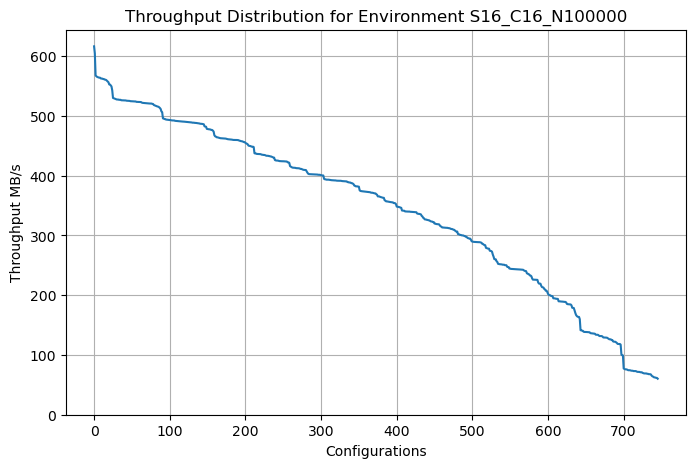

In [64]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from datetime import datetime, timedelta
import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

#all_files = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_10_5M*/*/*/*.csv')
all_files = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_10_5M*/S16_C16_N10000*.csv')

dict_env_df = {}

for file in all_files:

    #print(file.split("/")[-1].split("\\")[-1].split("_random")[0])
    
    df = pd.read_csv(file)
    env = file.split("/")[-1].split("\\")[-1].split("_random")[0]
    #env = file.split("\\")[-3]
    algo = file.split("\\")[-2]

    
    df = pd.read_csv(file)
    df = df[df['transfer_id'] > 1]
    if env not in dict_env_df.keys(): 
        dict_env_df[env] = []
    dict_env_df[env].append(df)


    
for env in dict_env_df.keys():
    
    all_data = pd.concat(dict_env_df[env], axis=0, ignore_index=True)
    
    all_data = all_data.sort_values(by='uncompressed_throughput',ascending=False).reset_index(drop=True)

    
    '''
    df = all_data
    
    df = df[df.buffer_size.isin([64, 256, 512, 1024])]


    df['client_bufpool_factor'] = df['client_bufferpool_size'] / df['buffer_size'] / 2 / (df['write_par'] + df['ser_par'] + df['decomp_par'] + df['rcv_par'])
    df['server_bufpool_factor'] = df['server_bufferpool_size'] / df['buffer_size'] / 2 / (df['read_par'] + df['deser_par'] + df['comp_par'] + df['send_par'])
    
    
    pd.to_numeric(df['client_bufpool_factor'], downcast='integer', errors='coerce')
    pd.to_numeric(df['server_bufpool_factor'], downcast='integer', errors='coerce')


    
    highest_throughput = df['uncompressed_throughput'].max()

    subset = df[df['uncompressed_throughput'] >= highest_throughput * 0.8]
    subset_rest = df[df['uncompressed_throughput'] < highest_throughput * 0.8]

    indices = np.linspace(0, len(subset) - 1, num=100, dtype=int)
    equally_sampled_subset = subset.iloc[indices].reset_index(drop=True)

    indices_rest = np.linspace(0, len(subset_rest)-1, num=100, dtype=int)
    equally_sampled_subset_rest = subset_rest.iloc[indices_rest].reset_index(drop=True)

    equally_sampled_subset = pd.concat([equally_sampled_subset,equally_sampled_subset_rest])
    
    result = equally_sampled_subset
    


    all_data = result.sort_values(by='uncompressed_throughput',ascending=False).reset_index(drop=True)
    #all_data = all_data.drop("Unnamed: 0",axis=1)
    all_data.to_csv(f'C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/currated_datasets_100high_100_rest/{env}_currated_dataset.csv', index=False)
    '''


    
    print(f"Max transfer throughput for env {env} :     {all_data['uncompressed_throughput'].max()}")
    print(f"Average transfer throughput for env {env} : {statistics.mean(all_data['uncompressed_throughput'])}")
    print(f"Min transfer throughput for env {env} :     {all_data['uncompressed_throughput'].min()}")
        
    plt.figure(figsize=(8, 5))
        
    plt.plot(all_data['uncompressed_throughput'])
    plt.grid()
    plt.xlabel('Configurations')
    plt.ylabel('Throughput MB/s')
    plt.ylim(bottom=0)
    plt.title(f"Throughput Distribution for Environment {env}")# and Algorithm {algo}")
    plt.show()

In [235]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from datetime import datetime, timedelta
import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

all_files = glob.glob('C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/results_10_5M*/*/*/*.csv')

dict_env_df = {}

for file in all_files:
    df = pd.read_csv(file)

    env = file.split("\\")[-3]
    algo = file.split("\\")[-2]

    
    df = pd.read_csv(file)
    df = df[df['transfer_id'] > 1]
    if env not in dict_env_df.keys(): 
        dict_env_df[env] = []
    dict_env_df[env].append(df)


    if len(df['host'].unique()) > 1:
        print(file)
        print("\n")

C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer\results_10_5M\S16_C16_N1000\cost_model_xgb_rs_exc_cluster_update_only_hist_v9\results_cost_model_xgb_rs_exc_cluster_update_only_hist_v9_2025-02-17_11-42-18.csv


C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer\results_10_5M\S8_C16_N150\cost_model_xgb_rs_exc_cluster_update_only_hist_v9\results_cost_model_xgb_rs_exc_cluster_update_only_hist_v9_2025-02-17_11-19-55.csv


C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer\results_10_5M_semi_flex\S2_C2_N50\tlbo_rgpe_prf_exc_S2C2N50_open_box_with_clustering_n_200\results_tlbo_rgpe_prf_exc_S2C2N50_open_box_with_clustering_n_200_2025-02-18_22-34-06.csv


C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer\results_10_5M_semi_flex\S2_C8_N50\cost_model_xgb_rs_exc_cluster_update_only_hist_v17\results_cost_model_xgb_rs_exc_cluster_update_only_hist_v17_2025-02-18_11-35-17.csv


